### Importando bibliotecas e dados

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
dados = pd.read_csv('Salary Dataset.csv')
dados.head()

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


In [200]:
dados.shape

(4344, 5)

In [201]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4341 non-null   object 
 1   Job Title          4344 non-null   object 
 2   Salaries Reported  4342 non-null   float64
 3   Location           4344 non-null   object 
 4   Salary             4344 non-null   object 
dtypes: float64(1), object(4)
memory usage: 169.8+ KB


### Traduzindo os nomes das colunas

In [202]:
dados.rename(columns = {
    'Company Name': 'empresa',
    'Job Title': 'cargo',
    'Salaries Reported': 'salarios_informados',
    'Location': 'cidade',
    'Salary': 'salario'}, inplace = True)

dados.head()

,empresa,cargo,salarios_informados,cidade,salario
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


### Tratando os dados nulos

In [203]:
dados.isnull().sum()

empresa                3
cargo                  0
salarios_informados    2
cidade                 0
salario                0
dtype: int64

In [204]:
dados[dados.empresa.isnull()]

,empresa,cargo,salarios_informados,cidade,salario
2279,NaN,Data Analyst,1.0,Pune,"₹23,500/mo"
3227,NaN,Data Engineer,1.0,Pune,"₹26,20,604/yr"
4026,NaN,Machine Learning Engineer/Data Scientist,1.0,Pune,"₹56,465/mo"


In [205]:
dados[dados.salarios_informados.isnull()]

,empresa,cargo,salarios_informados,cidade,salario
4027,First Student Data Scientist,Data Analyst,NaN,Pune,"₹4,53,300/yr"
4237,Amazon,Machine Learning Data Associate II,NaN,New Delhi,"₹3,29,439/yr"


In [206]:
dados = dados.dropna()
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4339 entries, 0 to 4343
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   empresa              4339 non-null   object 
 1   cargo                4339 non-null   object 
 2   salarios_informados  4339 non-null   float64
 3   cidade               4339 non-null   object 
 4   salario              4339 non-null   object 
dtypes: float64(1), object(4)
memory usage: 203.4+ KB


### Preparando coluna salário

In [207]:
# Checando as unidades de medidas

dados.salario.apply(lambda i : i.split('/')[-1]).unique()

array(['yr', 'mo', 'hr'], dtype=object)

In [208]:
# Verificando a moeda informada

dados.salario.apply(lambda i : i[0]).unique()

array(['₹', '$', '£', 'A'], dtype=object)

In [209]:
# Identificando o que signica a moeda "A"

dados[dados.salario.apply(lambda i : i[0] == 'A')]

,empresa,cargo,salarios_informados,cidade,salario
2278,md,Data Analyst,1.0,Pune,"AFN 1,56,179/yr"


Significa que é moeda local do Afeganistão

In [210]:
# Criando função para converter moedas pra Real (R$) - cotação em 12/03/22

def converter(salario):
    tipo = salario[0] # extraindo o tipo da moeda
    freq = salario.split('/')[-1] # extraindo a frequencia de pagamento
    salario = float(salario.split('/')[0][1:].replace (',', '').replace('FN', '')) # extraindo o valor numérico
    
    # Convertendo a modea para Real
    if tipo == '₹':
        salario *= 0.065
    elif tipo == '£':
        salario *= 5.508
    elif tipo == 'A':
        salario *= 0.056
    elif tipo == '$':
        salario *= 5.024
        
    # Convertendo a frequencia para mês
    if freq == 'yr':
        salario /= 12
    elif freq == 'hr':
        salario *= 220
        
    # Retornando o salário final
    return salario

In [211]:
# Aplicando a função no dataset

dados['salario_mes_real'] = dados.salario.apply(converter).round(2)
dados.head()

,empresa,cargo,salarios_informados,cidade,salario,salario_mes_real
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",3513.10
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",6456.40
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",4533.07
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",3626.88
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",5113.93


In [212]:
# Excluindo a coluna salario antiga

dados.drop('salario', axis = 1, inplace = True)
dados.head()

,empresa,cargo,salarios_informados,cidade,salario_mes_real
0,Mu Sigma,Data Scientist,105.0,Bangalore,3513.10
1,IBM,Data Scientist,95.0,Bangalore,6456.40
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,4533.07
3,Impact Analytics,Data Scientist,40.0,Bangalore,3626.88
4,Accenture,Data Scientist,32.0,Bangalore,5113.93


### Analisando os dados da amostra

In [213]:
dados.describe().round(2)

,salarios_informados,salario_mes_real
count,4339.00,4339.00
mean,2.78,6033.77
std,5.15,20699.12
min,1.00,58.58
25%,1.00,2275.00
50%,1.00,3840.39
75%,3.00,6500.00
max,105.00,768734.12


<AxesSubplot:title={'center':'Distribuição dos salários (escala logarítmica)'}, xlabel='Salário por mês', ylabel='Contagem'>

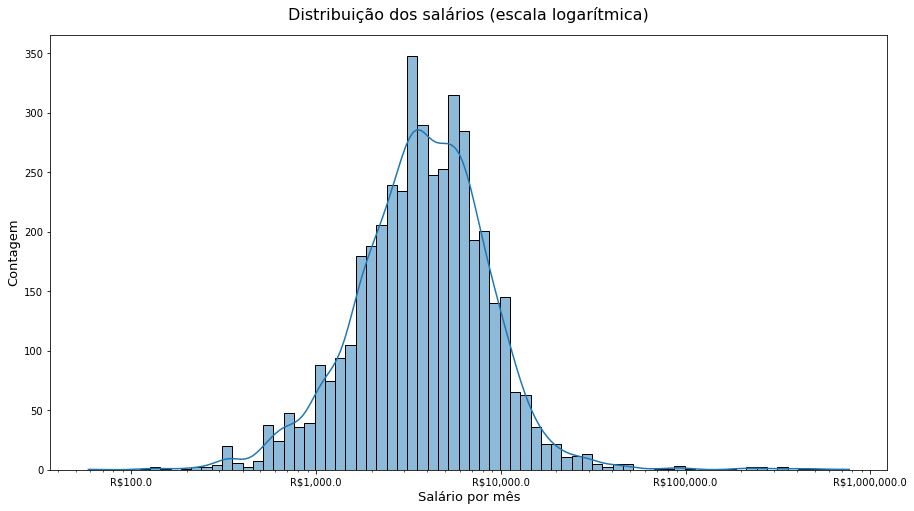

In [226]:
# Gerando o gráfico em escala logarítmica para verificar se a amostra se distribui normalmente
fig, ax = plt.subplots(figsize=(15,8))

sns.histplot(dados.salario_mes_real, kde = True, log_scale = True)
ax.set_title('Distribuição dos salários (escala logarítmica)', fontsize = 16, pad = 15)
ax.set_xlabel('Salário por mês', fontsize = 13)
ax.set_ylabel('Contagem', fontsize = 13)
ax.xaxis.set_major_formatter(lambda x, pos: f'R${format(x, ",")}')
ax

#### Top 20 empresas que pagam mais

In [223]:
# Considerei na análise apenas os cargos que tem ao menos 5 salários informados

elegiveis = dados.query('salarios_informados > 4')
top_20_empresas = elegiveis.sort_values('salario_mes_real', ascending = False)[:20]
top_20_empresas.head()

,empresa,cargo,salarios_informados,cidade,salario_mes_real
90,CRED,Data Scientist,5.0,Bangalore,16329.55
60,Swiggy,Data Scientist,6.0,Bangalore,15196.33
1254,ZS Associates,Data Science Consultant,5.0,Pune,14470.43
57,Adobe,Data Scientist,6.0,Bangalore,14213.67
46,Walmart,Data Scientist,8.0,Bangalore,13906.65


<AxesSubplot:title={'center':'Top 20 empresas que pagam mais'}, xlabel='Salário por mês'>

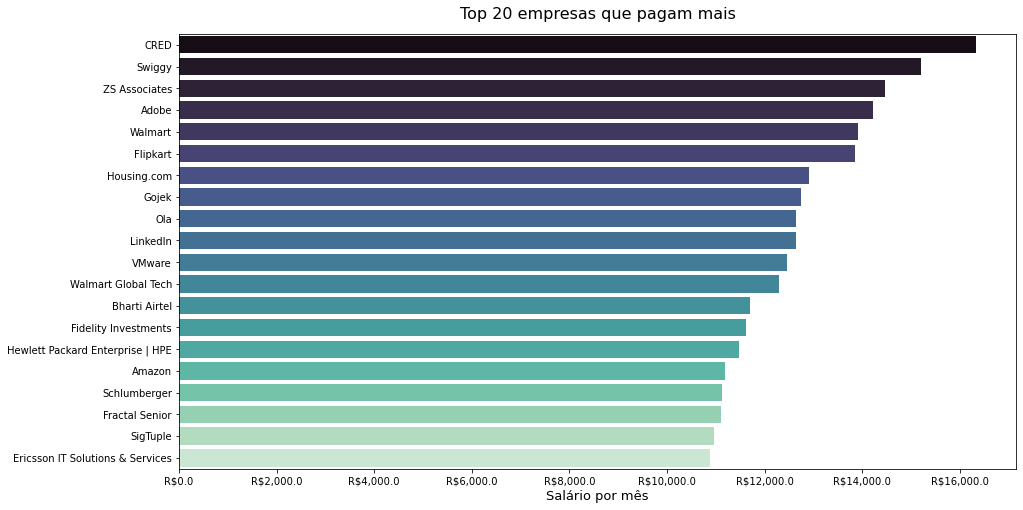

In [216]:
fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(x = 'salario_mes_real', y = 'empresa', data = top_20_empresas, palette = 'mako')
ax.set_title('Top 20 empresas que pagam mais', fontsize = 16, pad = 15)
ax.set_xlabel('Salário por mês', fontsize = 13)
ax.set_ylabel('')
ax.xaxis.set_major_formatter(lambda x, pos: f'R${format(x, ",")}')
ax

#### Top 10 profissões que recebem mais

In [217]:
agrupamento = elegiveis.groupby('cargo')
top_10_profissoes = agrupamento.salario_mes_real.mean().sort_values(ascending = False)[:10]
data1 = pd.DataFrame(top_10_profissoes)
data1['cargo'] = data1.index

<AxesSubplot:title={'center':'Top 10 profissões que recebem mais'}, xlabel='Salário por mês'>

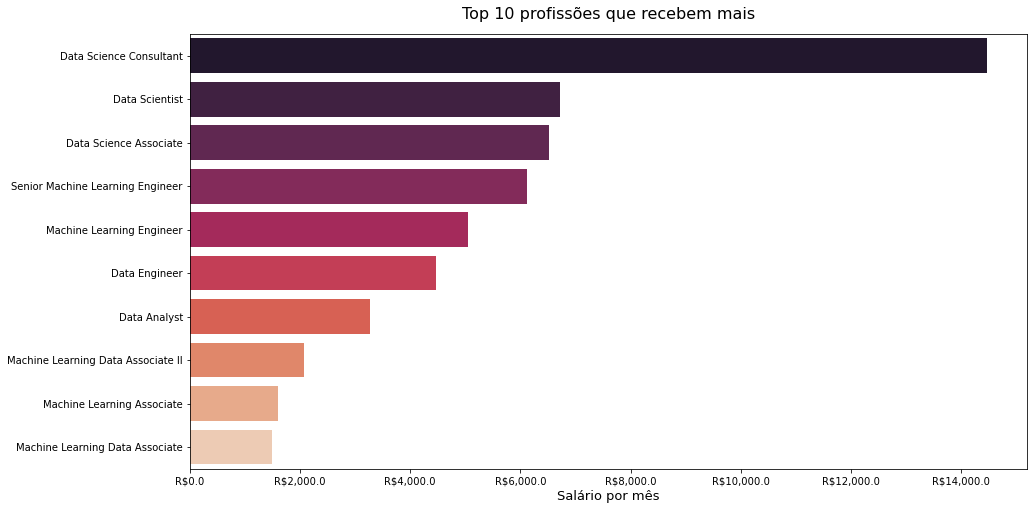

In [218]:
fig, ax = plt.subplots(figsize=(15,8))

sns.barplot(x = 'salario_mes_real', y = 'cargo', data = data1, palette = 'rocket')
ax.set_title('Top 10 profissões que recebem mais', fontsize = 16, pad = 15)
ax.set_xlabel('Salário por mês', fontsize = 13)
ax.set_ylabel('')
ax.xaxis.set_major_formatter(lambda x, pos: f'R${format(x, ",")}')
ax

#### Top 5 profissões mais frequentes

In [219]:
top_5_profissoes_frequentes = dados.cargo.value_counts()[:5]
top_5_profissoes_frequentes

Data Scientist               1844
Data Analyst                  988
Data Engineer                 804
Machine Learning Engineer     568
Data Science                   43
Name: cargo, dtype: int64

<AxesSubplot:>

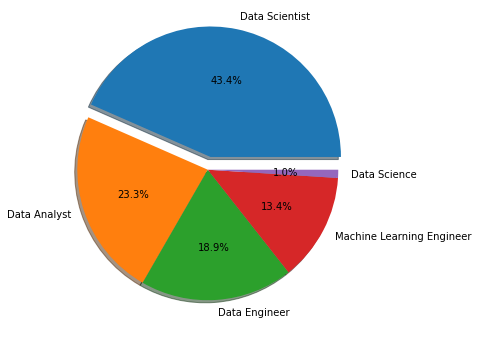

In [220]:
fig, ax = plt.subplots(figsize=(7,6))

separar = [0.1,0,0,0,0]

ax.pie(top_5_profissoes_frequentes, labels = top_5_profissoes_frequentes.index, 
       autopct = '%.1f%%', explode = separar, shadow = True)
ax

#### Top 5 cidades com maior média salarial

In [221]:
agrupamento1 = elegiveis.groupby('cidade')
top_5_cidades = agrupamento1.salario_mes_real.mean().sort_values(ascending = False)[:10]
data2 = pd.DataFrame(top_5_cidades)
data2['cidade'] = data2.index

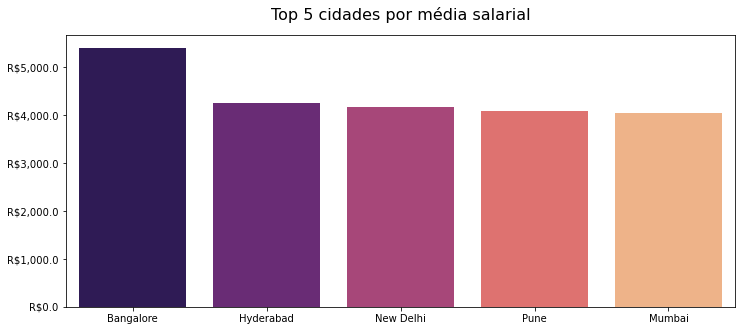

In [222]:
fig, ax = plt.subplots(figsize=(12,5))

sns.barplot(x='cidade', y = 'salario_mes_real', data = data2, palette = 'magma')
ax.set_title('Top 5 cidades por média salarial', fontsize=16, pad = 15)
ax.set_xlabel('')
ax.set_ylabel('')
ax.yaxis.set_major_formatter(lambda x, pos: f'R${format(x, ",")}')